In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [2]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [3]:
def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

In [4]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [5]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [7]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


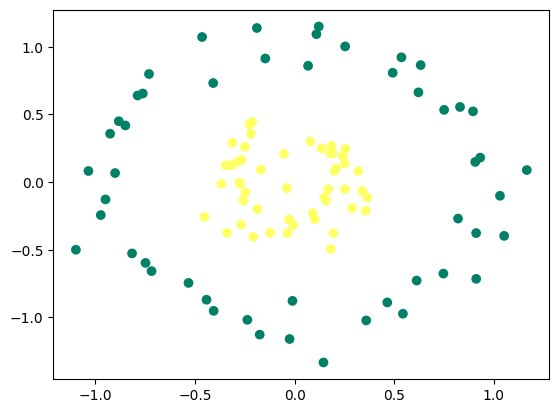

In [8]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:06<00:00, 432.43it/s]


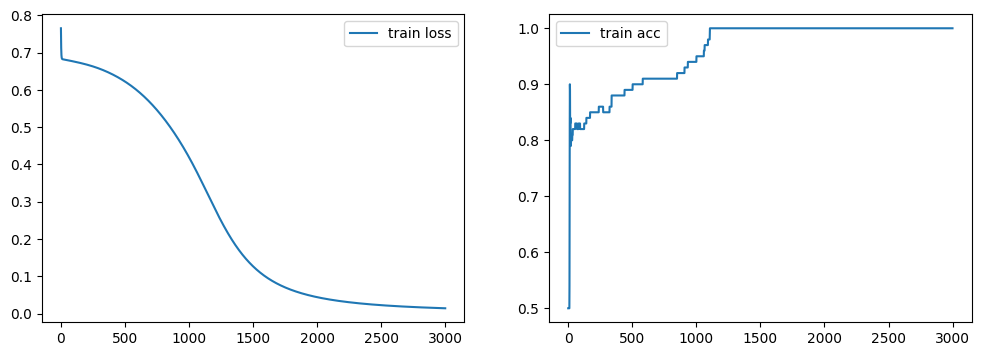

array([[0.76537816, 0.5       ],
       [0.73318091, 0.5       ],
       [0.71304419, 0.5       ],
       ...,
       [0.01403589, 1.        ],
       [0.01402475, 1.        ],
       [0.01401363, 1.        ]])

In [9]:
deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

In [7]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


c:\Users\pp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


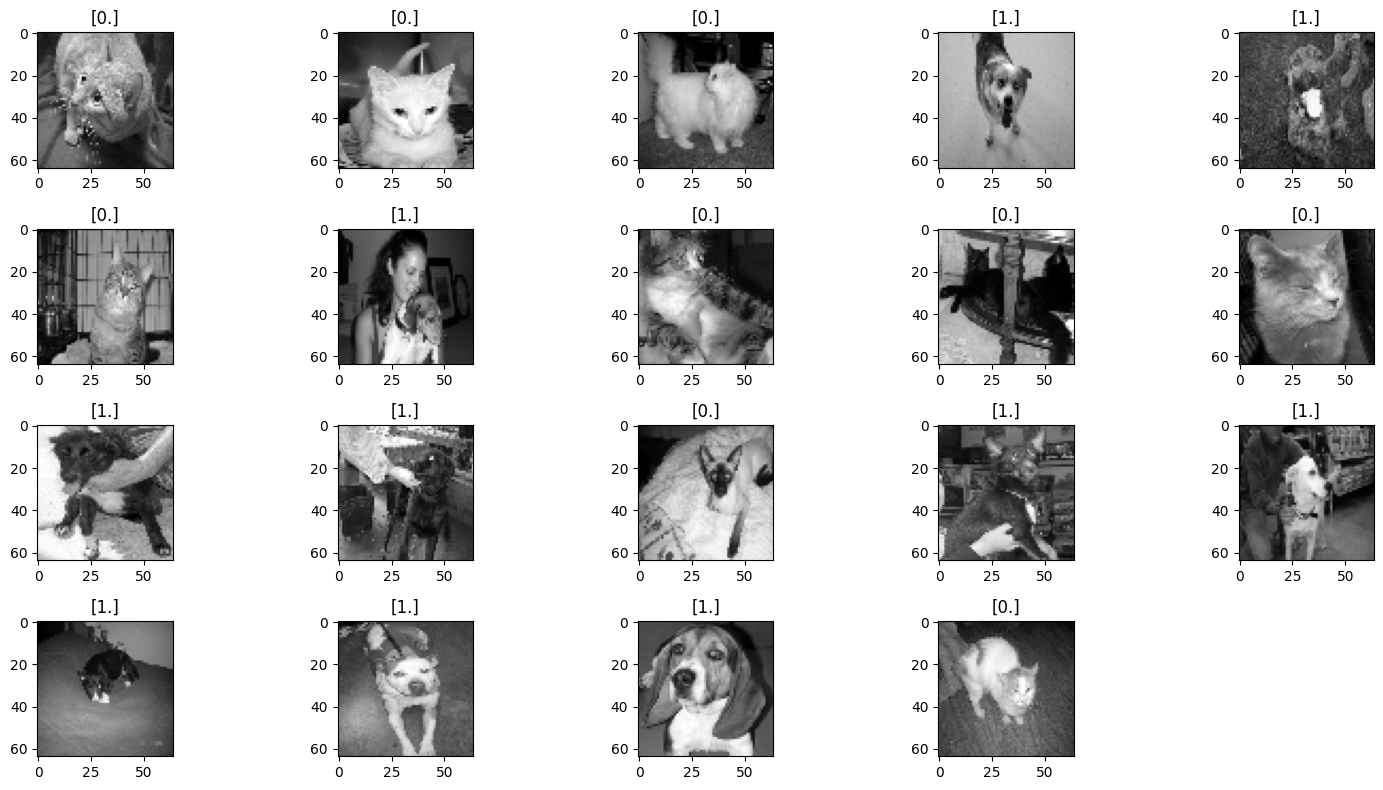

In [8]:
plt.figure(figsize=(16, 8))
for i in range(1, 20):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [9]:
Xnormalized_train=X_train/np.max(X_train)
Xnormalized_test=X_test/np.max(X_train)
Xnormalized_test.shape

(200, 64, 64)

In [15]:
xtrain= np.reshape(Xnormalized_train,(1000,64**2))
xtest= np.reshape(Xnormalized_test,(200,64**2))


In [16]:
xtrain_transposer = xtrain.T
xtest_transpo = xtest.T
xtrain_transposer.shape

(4096, 1000)

In [19]:
y_transpos = y_train.T
y_test_trns = y_test.T


100%|██████████| 3000/3000 [01:57<00:00, 25.46it/s]


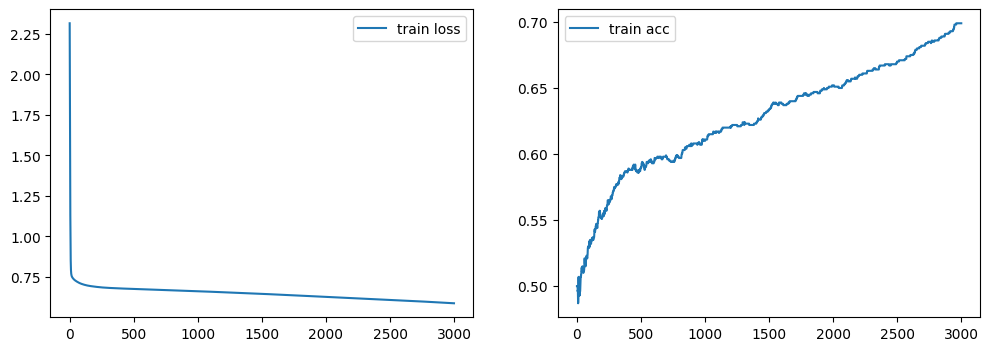

array([[2.31517111, 0.5       ],
       [2.0324045 , 0.5       ],
       [1.76267443, 0.5       ],
       ...,
       [0.5867307 , 0.699     ],
       [0.58668674, 0.699     ],
       [0.58664277, 0.699     ]])

In [16]:
deep_neural_network(xtrain_transposer, y_transpos, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

In [20]:
def deep_neural_network(X_train, y_train,X_test,y_test, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 1000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 4))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # if i%10==0:
        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y_train.flatten(), Af.flatten()))
        activations = forward_propagation(X_test, parametres)
        Af_testing = activations['A' + str(C)]
        training_history[i, 1] = (log_loss(y_test.flatten(), Af_testing.flatten()))
        y_pred = predict(X_train, parametres)
        training_history[i, 2] = (accuracy_score(y_train.flatten(), y_pred.flatten()))
        y_pred_testing = predict(X_test, parametres)
        training_history[i, 3] = (accuracy_score(y_test.flatten(), y_pred_testing.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='training loss')
    plt.plot(training_history[:, 1], label='testing loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 2], label='train acc')
    plt.plot(training_history[:, 3], label='test acc')
    plt.legend()
    plt.show()

    return parametres

100%|██████████| 2000/2000 [04:28<00:00,  7.44it/s]


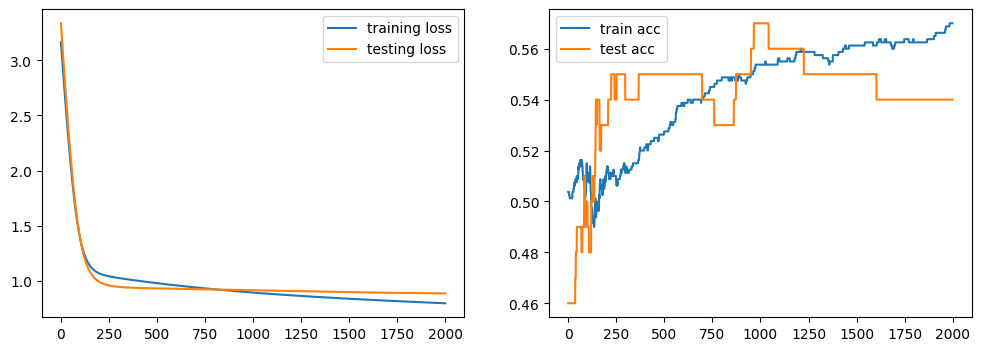

array([[3.16414439, 3.33586771, 0.50375   , 0.46      ],
       [3.13983349, 3.30961393, 0.50375   , 0.46      ],
       [3.11557835, 3.28341191, 0.50375   , 0.46      ],
       ...,
       [0.7963276 , 0.88629889, 0.57      , 0.54      ],
       [0.79625497, 0.88628486, 0.57      , 0.54      ],
       [0.79618238, 0.88627085, 0.57      , 0.54      ]])

In [22]:
deep_neural_network(xtrain_transposer[:,:800], y_transpos[:,:800],xtest_transpo[:,:100],y_test_trns[:,:100], hidden_layers = (128, 128, 128), learning_rate = 0.001, n_iter = 2000)